# UnitaryHack 2024 Demo Notebook

In [1]:
# Import the necessary libraries
import os
import numpy as np
import matplotlib.pyplot as plt
from tqdm import trange
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import plot_histogram
from qiskit.circuit.random import random_circuit
from qiskit_ionq import IonQProvider
from qiskit.transpiler import PassManager, PassManagerConfig
from qiskit.transpiler.preset_passmanagers.plugin import PassManagerStagePlugin
from qiskit.transpiler.basepasses import TransformationPass

In [2]:
# Initialize the IonQ provider and backend
api_key = os.getenv("IONQ_API_KEY") or input("Enter your IonQ API key: ")
provider = IonQProvider(token=api_key)
backend = provider.get_backend("simulator", gateset="native")

## Example Optimizer Plugin

In [3]:
class TrappedIonOptimizerPlugin(PassManagerStagePlugin):
    def pass_manager(
        self,
        pass_manager_config: PassManagerConfig,
        optimization_level: int = 0,
    ) -> PassManager:
        custom_pm = PassManager()
        if optimization_level == 0:
            pass
        if optimization_level >= 1:
            custom_pm.append(FirstPass())
        return custom_pm


class FirstPass(TransformationPass):
    def run(self, dag):
        return dag


# Optimizer initialization
custom_pass_manager_plugin = TrappedIonOptimizerPlugin()
pass_manager_config = PassManagerConfig()

# Create a custom pass manager
custom_pass_manager = custom_pass_manager_plugin.pass_manager(
    pass_manager_config,
    optimization_level=3,
)

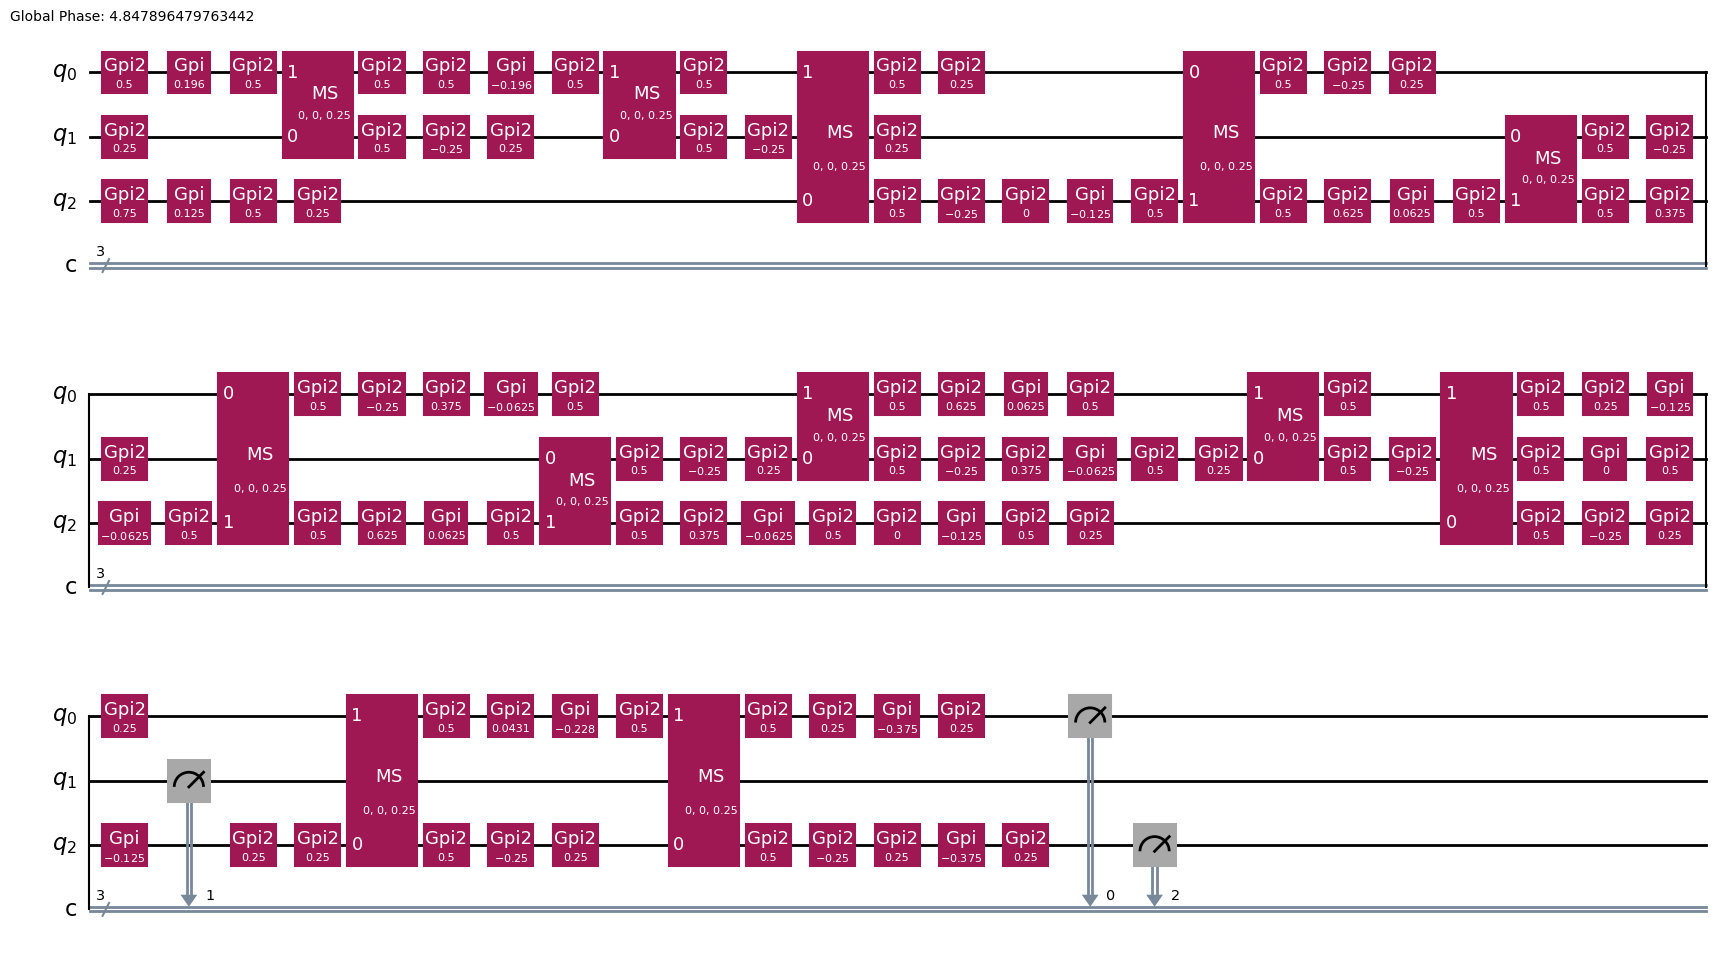

In [4]:
# Create a random circuit
r_qc = random_circuit(3, 3, measure=True)

# Optimize the circuit
o_qc = custom_pass_manager.run(r_qc)
t_qc = transpile(o_qc, backend=backend, optimization_level=3)

# Print the optimized circuit
t_qc.draw("mpl")

In [5]:
# Run the circuit
job = backend.run(t_qc, shots=1000)

{'000': 12, '101': 988}


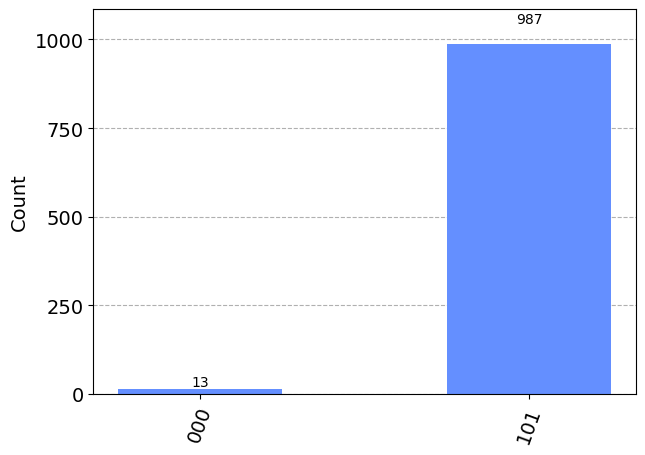

In [6]:
# Get the result
print(job.get_counts())

# Plot the result
plot_histogram(job.get_counts())

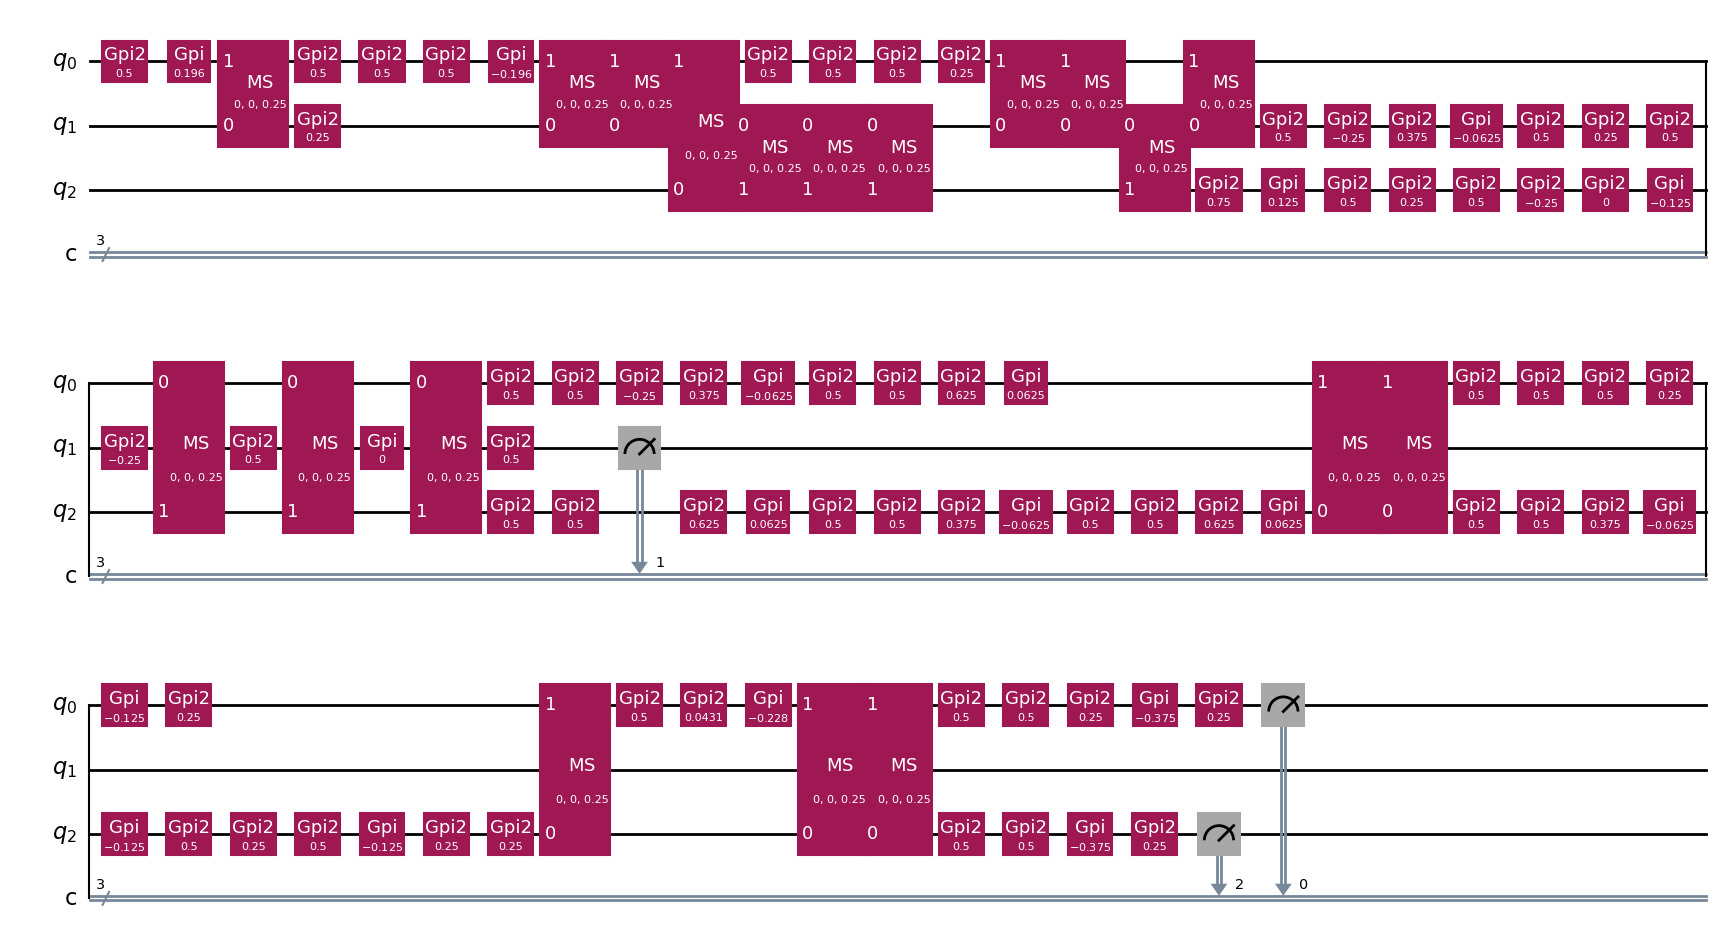

In [10]:
from custom_transpiler import IonQ_Transpiler


transpiler = IonQ_Transpiler(backend)
custom_qc = transpiler.transpile(r_qc)
custom_qc.draw("mpl")

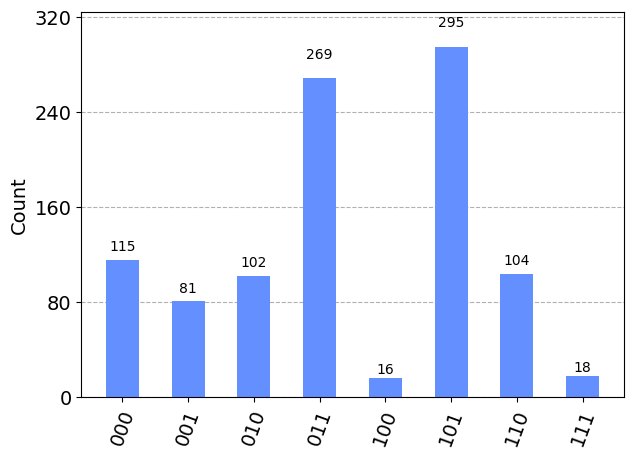

In [11]:
job1 = backend.run(custom_qc, shots=1000)
counts = job1.get_counts()
plot_histogram(job1.get_counts())